#BIRZEIT UNIVERSITY

#Ahmaide Awawda - 1190823

The needed libraries are imported in the following code to be used for this assigment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# **Question 1**

The following function will be used to plot edited gray images with their given titles using the matplot library

In [2]:
def plot_gray(gray_image, title, image_size=(3, 3), title_fontsize=10):
    plt.figure(figsize=image_size)
    plt.imshow(gray_image, cmap='gray')
    plt.title(title, fontsize=title_fontsize)
    plt.axis('off')
    plt.show()

1) The first part is to show the image, the chosen image that can be showed after running the code below is the telescope (same as Q4.png)

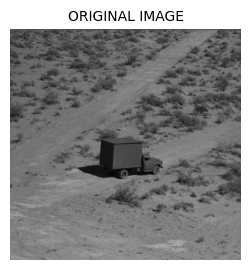

In [3]:
image = Image.open('Truck.tiff')
image = np.array(image)
plot_gray(image, 'ORIGINAL IMAGE')

2) The second part will implement the law transformation with gamma=0.4, using the following formula:

new-value = 255 x (old-value/255)^2

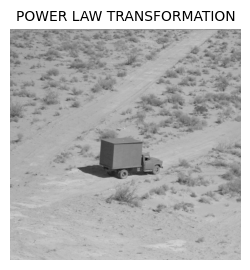

In [4]:
gamma = 0.4
gamma_corrected = np.array(255 * (image / 255) ** gamma, dtype='uint8')
plot_gray(gamma_corrected, 'POWER LAW TRANSFORMATION')

3) The third part will apply a zero-mean Gaussian noise (with variance = 40 grey-levels), as the Standard deviation is used to add the noise to the image as shown in the code below:

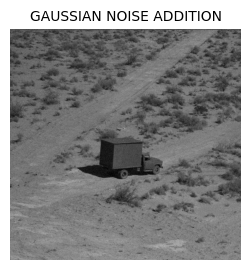

In [5]:
mean = 0
variance = 40
sigma = np.sqrt(variance)
gauss = np.random.normal(mean, sigma, image.shape).reshape(image.shape)
noisy = image + gauss
gaussian_noisy_image = np.clip(noisy, 0, 255).astype(np.uint8)
plot_gray(gaussian_noisy_image, 'GAUSSIAN NOISE ADDITION')

4) The fourth part will include applying a 5x5 mean filter to the image in the previous part which will make the image blurry and hide small details in order to reducd the the features in the image.

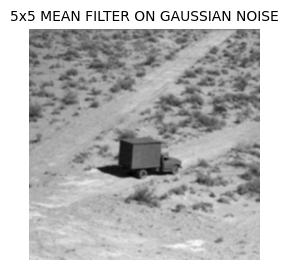

In [6]:
mean_filtered_image = cv2.blur(gaussian_noisy_image, (5, 5))
plot_gray(mean_filtered_image, '5x5 MEAN FILTER ON GAUSSIAN NOISE')

5) The fifth part will include adding the "salt & pepper noise" with noise-dencity=0.1 and then apply 7x7 mean filter to the image.

The first code will show the "salt & pepper" image which adds a random distributed noise to the image.

The second will be the filtered noisy image using th 7x7 median filter, yet it was noticed that it was way more blurry than the original image.

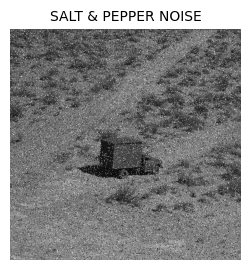

In [7]:
s_vs_p = 0.5
noise_density = 0.1
salt_peper_image = np.copy(image)
num_salt = np.ceil(noise_density * image.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
salt_peper_image[tuple(coords)] = 255
num_pepper = np.ceil(noise_density * image.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
salt_peper_image[tuple(coords)] = 0
plot_gray(salt_peper_image, 'SALT & PEPPER NOISE')

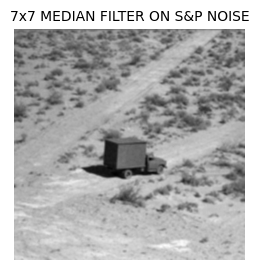

In [8]:
median_filtered_image = cv2.medianBlur(salt_peper_image, 7)
plot_gray(mean_filtered_image, '7x7 MEDIAN FILTER ON S&P NOISE')


6) The sixth part will incldue applying the 7x7 mean filter to the "salt & pepper noise" image from the previous part, the resut shows a blurry image (since it was filtered) with a clearly added noise to it (due to the salt & peper noise)

WHich concludes that the mean filter doesn't remove the noise such as the median one.

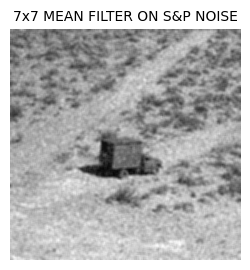

In [9]:
mean_filtered_image2 = cv2.blur(salt_peper_image, (7, 7))
plot_gray(mean_filtered_image2, '7x7 MEAN FILTER ON S&P NOISE')

7) The seventh part will include the implementation of the Sobel filter that will detect the difference of colors near the edges so it can spot them.

In this part the written code won't use any ready libraries as the code will be hand written as shown below.

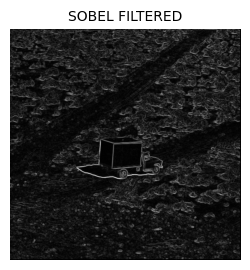

In [10]:
dx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
dy = [[1,  2,  1], [ 0,  0,  0], [-1, -2, -1]]
filtered_image = np.zeros_like(image, dtype=np.int32)
for i in range(len(image) - 2):
  for j in range(len(image) - 2):
    sum_x = np.sum(image[i:i+3, j:j+3] * dx)
    sum_y = np.sum(image[i:i+3, j:j+3] * dy)
    filtered_image[i][j] = round(np.sqrt(pow(sum_x, 2) + pow(sum_y, 2)))
plot_gray(filtered_image, 'SOBEL FILTERED')

#**Question 2**


The function that will be used to plot two images is as shown below

In [19]:
def plot_two_images(image1, image2, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image1, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image2, cmap='gray')
    plt.axis('off')
    plt.suptitle(title)
    plt.show()

The two houses images setup is in the following code

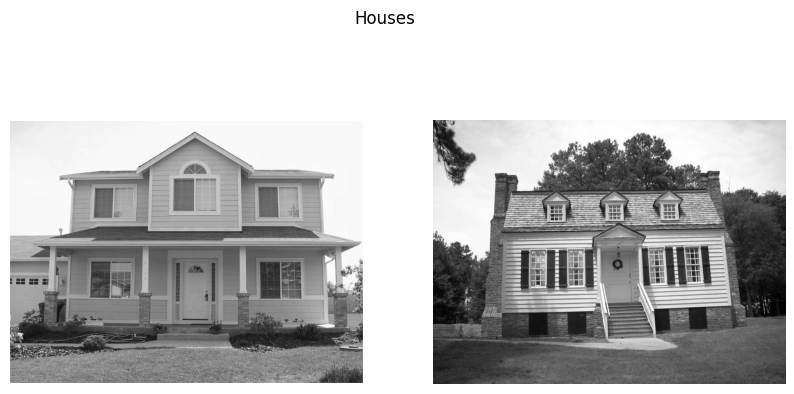

In [20]:
house1 = Image.open('House1.jpg')
house1 = np.array(house1)
house2 = Image.open('House2.jpg')
house2 = np.array(house2)
plot_two_images(house1, house2, "Houses")

The function below convolves a given image with a given convolution filter, as it also adds the needed padding.

In [59]:
def myFilter(input_image, filter):
    image_height, image_width = len(input_image), len(input_image[0])
    filter_height, filter_width = len(filter), len(filter[0])
    pad_height = filter_height // 2
    pad_width = filter_width // 2
    padded_image = [[0 for _ in range(image_width + 2 * pad_width)] for _ in range(image_height + 2 * pad_height)]
    for i in range(image_height):
        for j in range(image_width):
            padded_image[i + pad_height][j + pad_width] = input_image[i][j]
    output_image = [[0 for _ in range(image_width)] for _ in range(image_height)]

    for i in range(image_height):
        for j in range(image_width):
            sum = 0
            for k in range(filter_height):
                for l in range(filter_width):
                    image_value = padded_image[i + k][j + l]
                    filter_value = filter[k][l]
                    sum += image_value * filter_value
            output_image[i][j] = sum

    return output_image

The function below generates a gaussian kernal that can be used in the second part of this question.

In [60]:
def gaussian_kernel_function(size, sigma):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = np.exp(-(kernel_1D[i] ** 2) / (2 * sigma ** 2))
    kernel_1D /= np.sum(kernel_1D)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    kernel_2D *= 1.0 / np.sum(kernel_2D)
    return kernel_2D


1) For the first part the averaging Kernal is done for both images, as the first code will do it with an averaging of 3x3 and the second with a 5x5.

It is noticed that the increase in the Kernal averaging makes the image more blurry and the padding becomes more obvious.

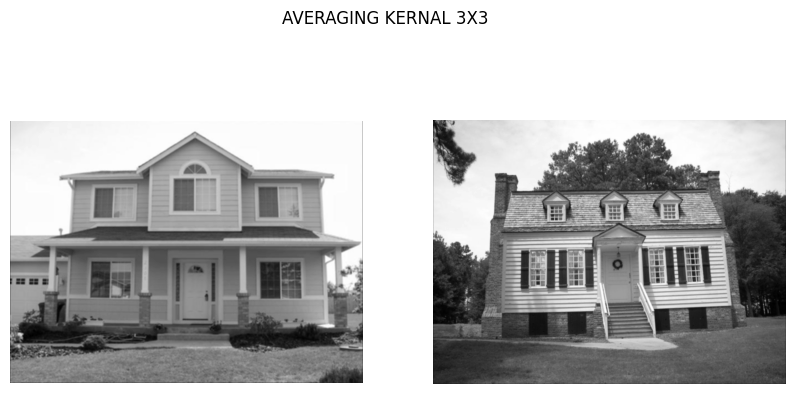

In [61]:
avg_kernel_3x3 = np.ones((3, 3), np.float32) / 9
house1_3x3 = myFilter(house1, avg_kernel_3x3)
house2_3x3 = myFilter(house2, avg_kernel_3x3)
plot_two_images(house1_3x3, house2_3x3, "AVERAGING KERNAL 3X3")

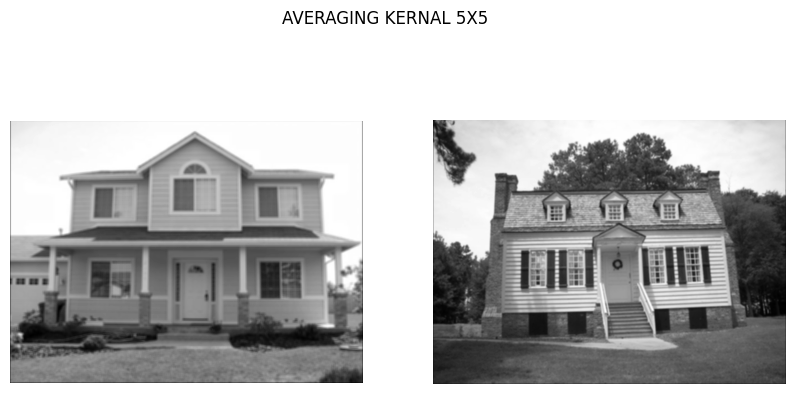

In [62]:
avg_kernel_5x5 = np.ones((5, 5), np.float32) / 25
house1_5x5 = myFilter(house1, avg_kernel_5x5)
house2_5x5 = myFilter(house2, avg_kernel_5x5)
plot_two_images(house1_5x5, house2_5x5, "AVERAGING KERNAL 5X5")

2) For this part the Gaussian kernal is implemented for the values (σ = 1,2,3 ), for both houses, in the result it was concluded that the more the σ is increased the more blurry the image becomes as the distribution is increased.

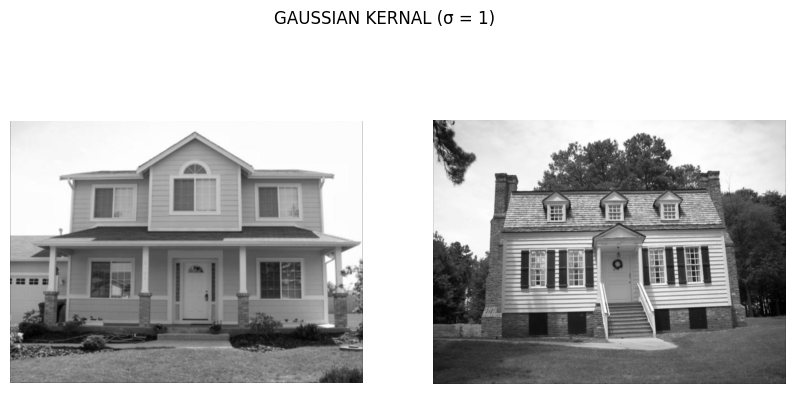

In [63]:
sigma = 1
size = 2 * sigma + 1
gaussian_kernel1 = gaussian_kernel_function(size, sigma)
house1_gaussian1 = myFilter(house1, gaussian_kernel1)
house2_gaussian1 = myFilter(house2, gaussian_kernel1)
plot_two_images(house1_gaussian1, house2_gaussian1, "GAUSSIAN KERNAL (σ = 1)")

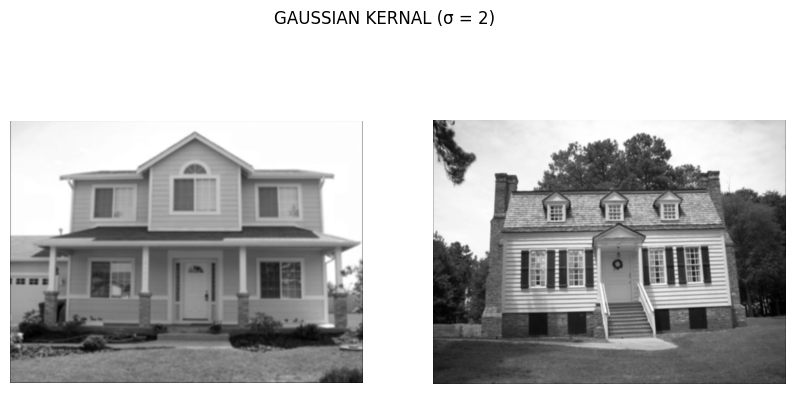

In [64]:
sigma = 2
size = 2 * sigma + 1
gaussian_kernel2 = gaussian_kernel_function(size, sigma)
house1_gaussian2 = myFilter(house1, gaussian_kernel2)
house2_gaussian2 = myFilter(house2, gaussian_kernel2)
plot_two_images(house1_gaussian2, house2_gaussian2, "GAUSSIAN KERNAL (σ = 2)")

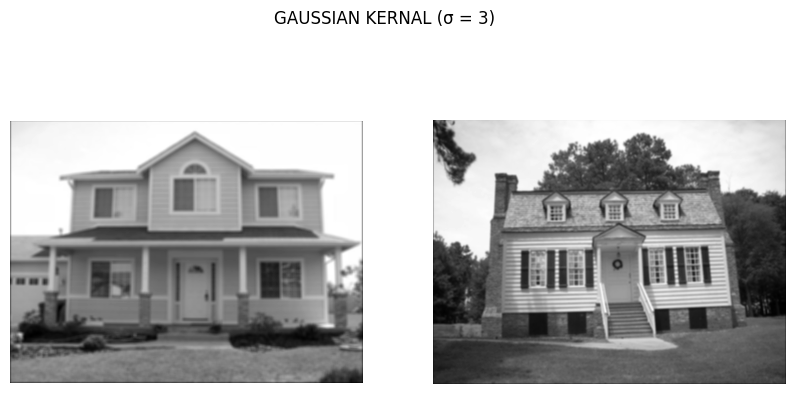

In [65]:
sigma = 3
size = 2 * sigma + 1
gaussian_kernel3 = gaussian_kernel_function(size, sigma)
house1_gaussian3 = myFilter(house1, gaussian_kernel3)
house2_gaussian3 = myFilter(house2, gaussian_kernel3)
plot_two_images(house1_gaussian3, house2_gaussian3, "GAUSSIAN KERNAL (σ = 3)")

3) In this part the sobel filter is implemented, as the first code will be for the sobel X filter, and the second code for the sobel Y filter, and the third one for the magnitude of the both of them.

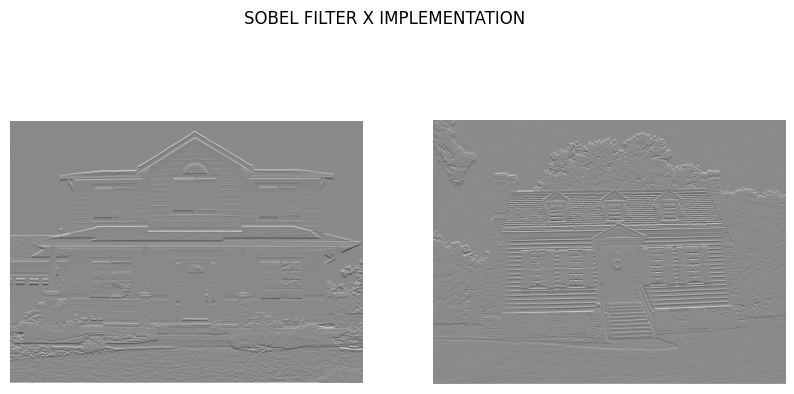

In [66]:
sobelx = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)
house1_sobelx = myFilter(house1, sobelx)
house2_sobelx = myFilter(house2, sobelx)
plot_two_images(house1_sobelx, house2_sobelx, "SOBEL FILTER X IMPLEMENTATION")

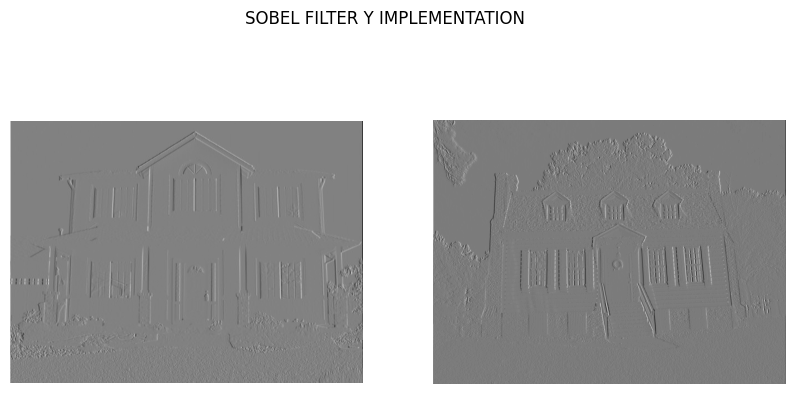

In [67]:
sobely = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
house1_sobely = myFilter(house1, sobely)
house2_sobely = myFilter(house2, sobely)
plot_two_images(house1_sobely, house2_sobely, "SOBEL FILTER Y IMPLEMENTATION")

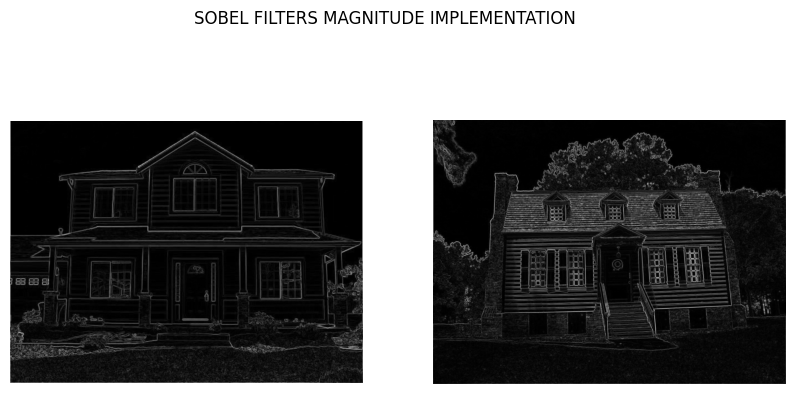

In [73]:
house1_sobel_magnitude = np.sqrt(np.square(house1_sobelx) + np.square(house1_sobely))
house2_sobel_magnitude = np.sqrt(np.square(house2_sobelx) + np.square(house2_sobely))
plot_two_images(house1_sobel_magnitude, house2_sobel_magnitude, "SOBEL FILTERS MAGNITUDE IMPLEMENTATION")

4) In this part the prewitt edge operator is implemented, as the first code will be for the prewitt X filter, the second code for the prewitt Y filter, and the third code for the magnitude of the both of them.


It was noticed that the prewitt filter givesa better result than the sobel filter as it gave out less unnecessary deatils and edges.

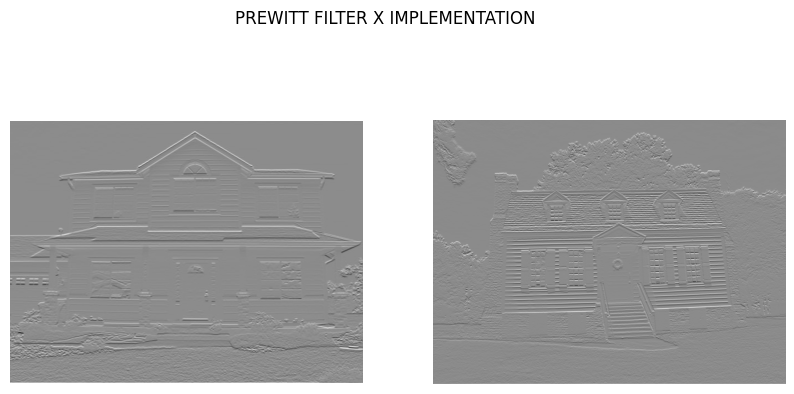

In [70]:
prewittx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
house1_prewittx = myFilter(house1, prewittx)
house2_prewittx = myFilter(house2, prewittx)
plot_two_images(house1_prewittx, house2_prewittx, "PREWITT FILTER X IMPLEMENTATION")

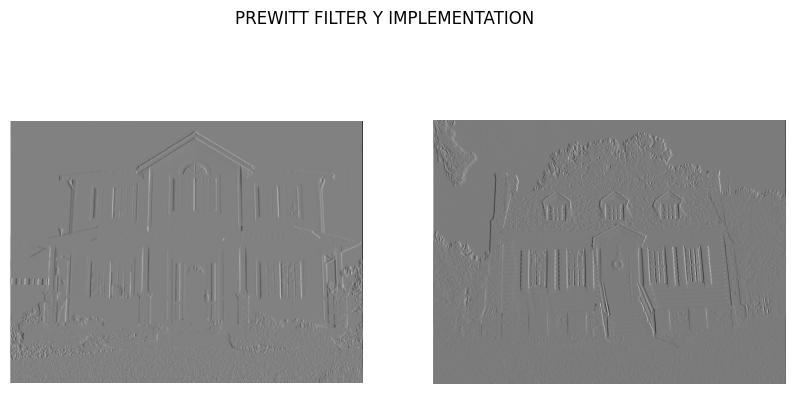

In [71]:
prewitty = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
house1_prewitty = myFilter(house1, prewitty)
house2_prewitty = myFilter(house2, prewitty)
plot_two_images(house1_prewitty, house2_prewitty, "PREWITT FILTER Y IMPLEMENTATION")

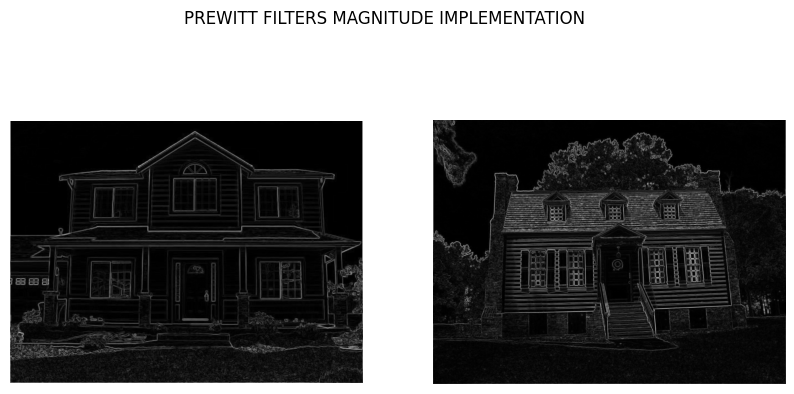

In [74]:
house1_prewitt_magnitude = np.sqrt(np.square(house1_prewittx) + np.square(house1_prewitty))
house2_prewitt_magnitude = np.sqrt(np.square(house2_prewittx) + np.square(house2_prewitty))
plot_two_images(house1_prewitt_magnitude, house2_prewitt_magnitude, "PREWITT FILTERS MAGNITUDE IMPLEMENTATION")

#**Question 3**

In this Question given two noisy images corrupted by the salt and paper noise, two filters are implemented (Averaging filter, and median filter).

After running the code below it will be noticed that the result of the median filter was better for both images as the averaging filter will calculate the average in a neighborhood as it makes the impact of any pixel's intensity weaker making its contribution equal to the other pixels which will make it less helpful.

On the other hand the median filter has a non-uniform approach to smoothing which allows it to preserve edges better and clear the noise better than the averaging filter.

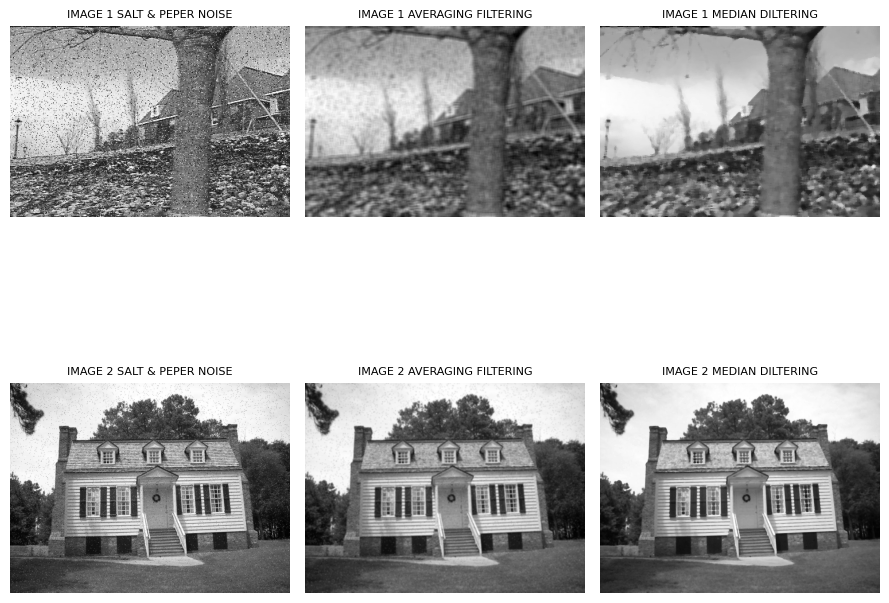

In [35]:
noisy_image1 = Image.open('Noisyimage1.jpg')
noisy_image1 = np.array(noisy_image1)
noisy_image2 = Image.open('Noisyimage2.jpg')
noisy_image2 = np.array(noisy_image2)
noisy1_avg = cv2.blur(noisy_image1, (5, 5))
noisy2_avg = cv2.blur(noisy_image2, (5, 5))
noisy1_median = cv2.medianBlur(noisy_image1, 5)
noisy2_median = cv2.medianBlur(noisy_image2, 5)
images = [noisy_image1, noisy1_avg, noisy1_median, noisy_image2, noisy2_avg, noisy2_median]
titles = ["IMAGE 1 SALT & PEPER NOISE", "IMAGE 1 AVERAGING FILTERING", "IMAGE 1 MEDIAN DILTERING", "IMAGE 2 SALT & PEPER NOISE", "IMAGE 2 AVERAGING FILTERING", "IMAGE 2 MEDIAN DILTERING"]

plt.figure(figsize=(9, 9))
for i, (image, title) in enumerate(zip(images, titles), 1):
        plt.subplot(2, 3, i)
        plt.imshow(image, cmap='gray')
        plt.title(title, fontsize = 8)
        plt.axis('off')

plt.tight_layout()
plt.show()

# **Question 4**

In this part the token photo will be applied to a sobel gradient function, as first it will be displayed with the resulting magnitude, then two histograms for both gradient magnitude, and gradient orientation.

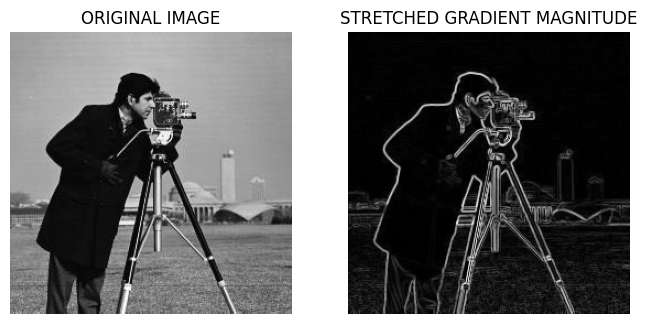

In [ ]:
telescope_image = Image.open('Q_4.jpg')
telescope_image = np.array(telescope_image)

sobelx_telescope = cv2.Sobel(telescope_image, cv2.CV_64F, 1, 0, ksize=3)
sobely_telescope = cv2.Sobel(telescope_image, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(sobelx_telescope**2 + sobely_telescope**2)
gradient_magnitude = np.interp(gradient_magnitude, (gradient_magnitude.min(), gradient_magnitude.max()), (0, 255))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(telescope_image, cmap='gray')
plt.title('ORIGINAL IMAGE')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('STRETCHED GRADIENT MAGNITUDE')
plt.axis('off')
plt.show()

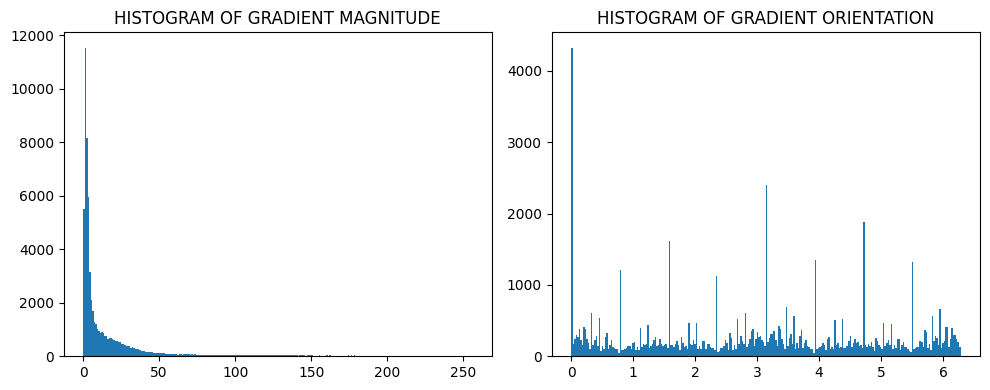

In [ ]:
gradient_orientation = np.arctan2(sobelx_telescope, sobely_telescope)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(gradient_magnitude.ravel(), bins=256, range=[0, 256])
plt.title('HISTOGRAM OF GRADIENT MAGNITUDE')

gradient_orientation = np.mod(gradient_orientation + 2 * np.pi, 2 * np.pi)
plt.subplot(1, 2, 2)
plt.hist(gradient_orientation.ravel(), bins=256, range=[0, 2 * np.pi])
plt.title('HISTOGRAM OF GRADIENT ORIENTATION')

plt.tight_layout()
plt.show()

# **Question 5**

In this part there are two pictures that include people walking, these two pictures are subtracted from each other.

The result that is shown by running the following code as subtracting the second image from the first one will show the shapes with the shadows of the people in the first image.

Subtracting the first image from the second one will show the shapes with the shadows of the people in the second image.

Finally, Adding the both subtractions will show the shapes with shadows of the combination of both images.

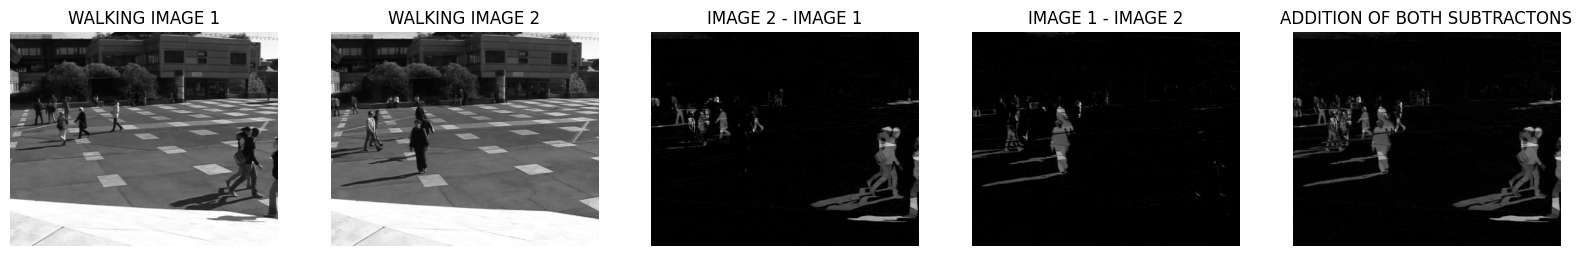

In [ ]:
walk1 = Image.open('walk_1.jpg')
walk1 = np.array(walk1)
walk2 = Image.open('walk_2.jpg')
walk2 = np.array(walk2)
walk1_gray = cv2.cvtColor(walk1, cv2.COLOR_BGR2GRAY)
walk2_gray = cv2.cvtColor(walk2, cv2.COLOR_BGR2GRAY)

subtracted_image1 = cv2.subtract(walk2_gray, walk1_gray)
subtracted_image2 = cv2.subtract(walk1_gray, walk2_gray)
final_image = cv2.add(subtracted_image1, subtracted_image2)

plt.figure(figsize=(20, 5))
images_q5 = [walk1_gray, walk2_gray, subtracted_image1, subtracted_image2, final_image]
titles_q5 = ['WALKING IMAGE 1', 'WALKING IMAGE 2', 'IMAGE 2 - IMAGE 1', 'IMAGE 1 - IMAGE 2', 'ADDITION OF BOTH SUBTRACTONS']

for i, (image, title) in enumerate(zip(images_q5, titles_q5), 1):
  plt.subplot(1, 5, i)
  plt.imshow(image, cmap='gray')
  plt.title(title)
  plt.axis('off')

plt.show()

# **Question 6**

In this question using the telescope image from question 4, the canny edge detector is implemented using differnt threshold values (50-100, 100-150, 150-200, 200-250)

It is noticed that higher threshold ranges gives less details.

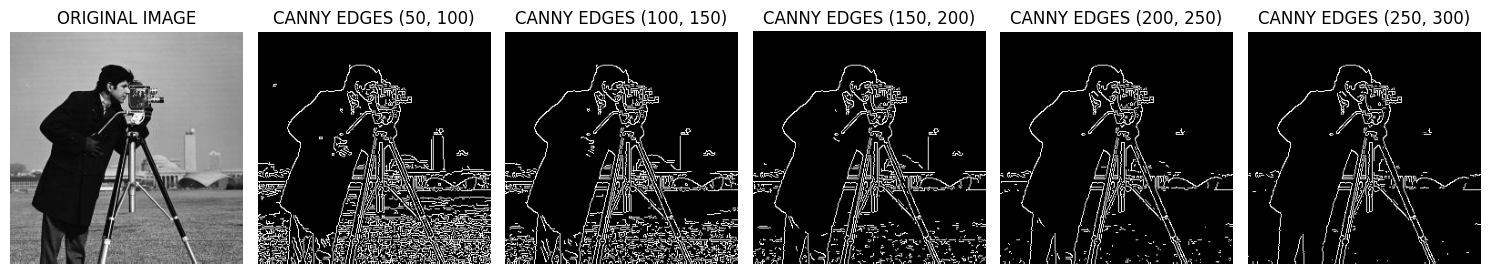

In [ ]:
telescope_image = Image.open('Q_4.jpg')
telescope_image = np.array(telescope_image)
thresholds = [(50, 100), (100, 150), (150, 200), (200, 250), (250, 300)]

canny_images = []
for lower, upper in thresholds:
    canny = cv2.Canny(telescope_image, lower, upper)
    canny_images.append(canny)

plt.figure(figsize=(15, 5))
plt.subplot(1, len(thresholds) + 1, 1)
plt.imshow(telescope_image, cmap='gray')
plt.title('ORIGINAL IMAGE')
plt.axis('off')

for i, image in enumerate(canny_images, 2):
    plt.subplot(1, len(thresholds) + 1, i)
    plt.imshow(image, cmap='gray')
    plt.title(f'CANNY EDGES {thresholds[i-2]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

